# Hough Transformation: Line Detection

## Importing Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage import data

import cv2
import math
import requests
from math import sin, cos, radians

## Image Acquisition

Original Image:
*) Height (Number of rows - 2D arrays): 400
*) Width (Number of columns - 1D arrays): 800
*) Channels (Number of elements in 1D arrays): 3


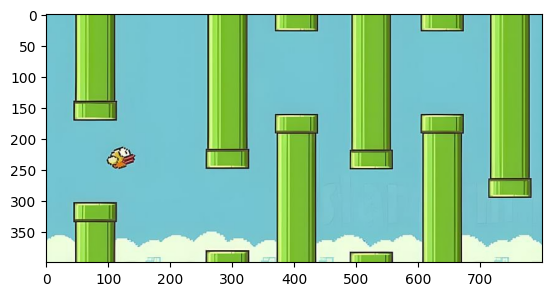

In [33]:
# Importing the sample image from Github
response = requests.get("https://images.yourstory.com/cs/2/96eabe90392211eb93f18319e8c07a74/Imageg79l-1682602936960.jpg")
if response.status_code == 200:
  img_data = response.content
else:
  print("Error downloading image: ", response.status_code)
  exit()

# Converting buffer image to a numpy array
img_array = np.frombuffer(img_data, np.uint8)

# Decoding the numpy array as a BGR image (color)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Convert BGR image to RGB image
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying the image
row_len = rgb_image.shape[0]
col_len = rgb_image.shape[1]
channel_len = rgb_image.shape[2]
print("Original Image:")
print(f"*) Height (Number of rows - 2D arrays): {row_len}")
print(f"*) Width (Number of columns - 1D arrays): {col_len}")
print(f"*) Channels (Number of elements in 1D arrays): {channel_len}")
plt.imshow(rgb_image)

## Pre-Processing

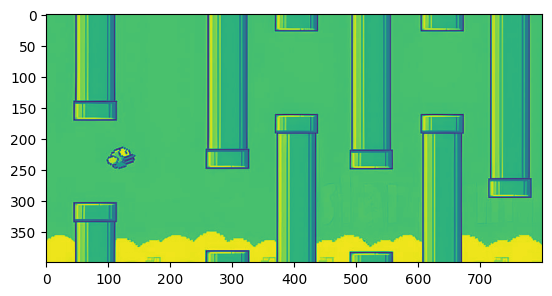

In [34]:
# Convert the image to grayscale
gray_image = rgb2gray(rgb_image)
plt.imshow(gray_image)

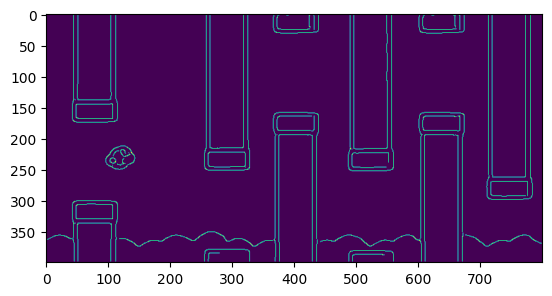

In [35]:
# Perform edge detection
edges = canny(gray_image, sigma=3)
plt.imshow(edges)

## Feature Extraction

In [36]:
# Define the hough space parameters (angle/theta & distance/rho)
# linspace -> Linearly spaced value (the space doesn't grow)
# rho -> distance from origin to the line [-max distance, max distance]
# theta -> Angle from origin to the line [-90deg, 90deg]
# ρ = x cos θ + y sin θ
theta = np.linspace(-np.pi / 2, np.pi / 2, 360)
distances = np.linspace(-100, 100, 200)

In [36]:
# Perform the hough transform 
accumulator, thetas, rhos = hough_line(edges, theta=theta)

In [37]:
# Find peaks in the hough space
hough_peaks = hough_line_peaks(accumulator, thetas, rhos)

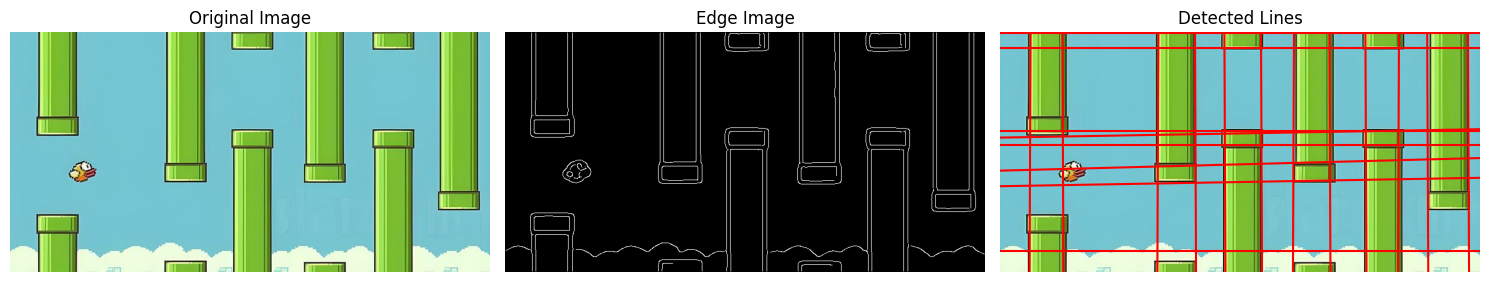

In [38]:
# Reconstructing the detected lines
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(rgb_image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Edge Image')
ax[1].axis('off')

ax[2].imshow(rgb_image, cmap=plt.cm.gray)
for _, angle, dist in zip(*hough_peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - rgb_image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, rgb_image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, rgb_image.shape[1]))
ax[2].set_ylim((rgb_image.shape[0], 0))
ax[2].set_title('Detected Lines')
ax[2].axis('off')

plt.tight_layout()
plt.show()

The code above implements the Hough Transform, a technique used for detecting shapes, particularly lines, in digital images. Let's break down how it works:

**1. Image Preprocessing:**
   First, we load an example image using the `data.camera()` function from the scikit-image library. This image serves as our input for line detection. To make the lines more detectable, we perform edge detection using the Canny edge detection algorithm. This step highlights the edges of objects in the image, which is crucial for the subsequent Hough Transform.

**2. Hough Transform:**
   The Hough Transform works by representing lines in an image as points in parameter space. In this code, we define the parameter space using two parameters: angle (`theta`) and distance (`rho`). We specify a range of angles (-90 degrees to 90 degrees) and distances (-100 to 100 pixels) to cover potential lines in the image.

   We then apply the Hough Transform to the edge-detected image. This process involves looping through all the edge pixels and, for each pixel, calculating the corresponding lines in parameter space. We increment the accumulator array at the coordinates corresponding to these lines. The accumulator array stores the votes for each line in parameter space, with higher votes indicating a higher likelihood of a line existing at that parameter combination.

**3. Peak Detection:**
   After the Hough Transform, we identify peaks in the accumulator array. These peaks represent the most prominent lines detected in the image. We use the `hough_line_peaks` function to find these peaks, specifying a threshold to filter out weaker lines.

**4. Visualization:**
   Finally, we visualize the original image, the edge-detected image, and the detected lines. We overlay the detected lines onto the original image to show where the lines are located. This visualization helps us understand the effectiveness of the Hough Transform in detecting lines in the image.

In summary, the code demonstrates how to apply the Hough Transform for line detection in a digital image. By representing lines in parameter space and detecting peaks in the accumulator array, we can robustly identify lines even in noisy images. This technique finds applications in various fields, including computer vision, robotics, and medical imaging, where detecting shapes like lines is essential for analysis and decision-making.

# Hough Transformation: Circle Detection

## Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage import data

import cv2
import math
import requests
from math import sin, cos, radians

## Image Acquisition

Original Image:
*) Height (Number of rows - 2D arrays): 833
*) Width (Number of columns - 1D arrays): 1480
*) Channels (Number of elements in 1D arrays): 3


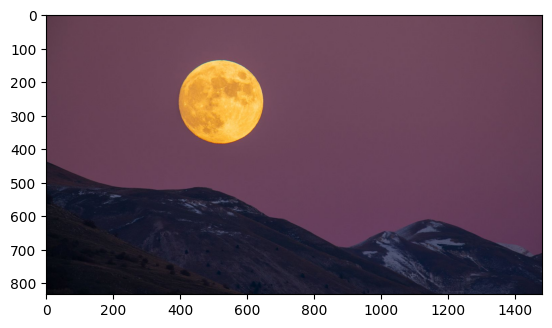

In [4]:
# Importing the sample image from Github
response = requests.get("https://media.cnn.com/api/v1/images/stellar/prod/gettyimages-1244582405.jpg?c=16x9&q=h_833,w_1480,c_fill")
if response.status_code == 200:
  img_data = response.content
else:
  print("Error downloading image: ", response.status_code)
  exit()

# Converting buffer image to a numpy array
img_array = np.frombuffer(img_data, np.uint8)

# Decoding the numpy array as a BGR image (color)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Convert BGR image to RGB image
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying the image
row_len = rgb_image.shape[0]
col_len = rgb_image.shape[1]
channel_len = rgb_image.shape[2]
print("Original Image:")
print(f"*) Height (Number of rows - 2D arrays): {row_len}")
print(f"*) Width (Number of columns - 1D arrays): {col_len}")
print(f"*) Channels (Number of elements in 1D arrays): {channel_len}")
plt.imshow(rgb_image)

## Pre-Processing

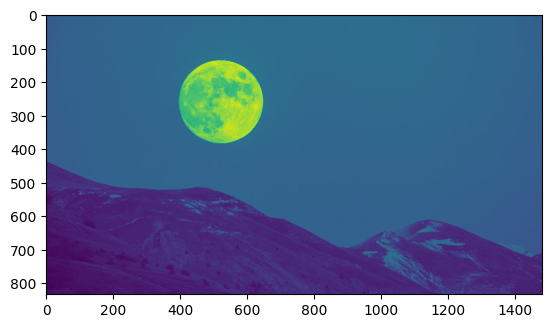

In [5]:
# Convert the image to grayscale
gray_image = rgb2gray(rgb_image)
plt.imshow(gray_image)

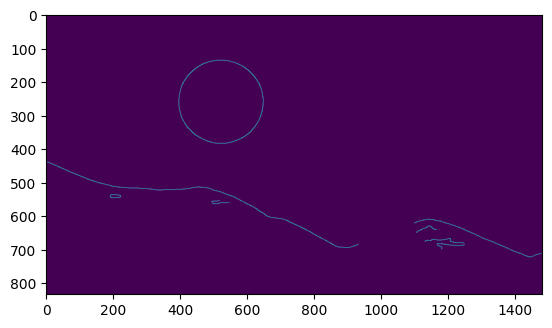

In [10]:
# Perform edge detection
edges = canny(gray_image, sigma=3)
plt.imshow(edges)

## Feature Extraction

In [29]:
# Define the radii range for circle detection
min_radius = 20
max_radius = 30

# Perform Hough Transform for circles
hough_radii = np.arange(min_radius, max_radius, 1)
hough_res = hough_circle(edges, hough_radii)

# Find peaks in the accumulator array
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=3)

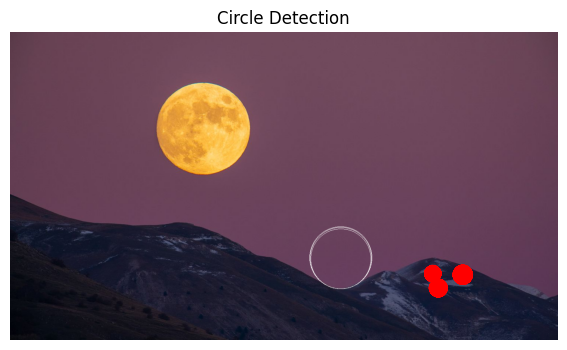

In [30]:
# Display the results
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
ax.imshow(rgb_image, cmap=plt.cm.gray)
ax.set_title('Circle Detection')
ax.axis('off')

# Plot detected circles
for center_x, center_y, radius in zip(cx, cy, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    rgb_image[circy, circx] = 255
    ax.plot(center_x, center_y, 'r+', markersize=10)
    ax.plot(circx, circy, 'r-', linewidth=2)

plt.show()